# Part 3: Introducing Consensus Algorithms

##### first lets look at a simple implementation of a leader follower algorithm, though not fully decentralized its a good visual starting point 

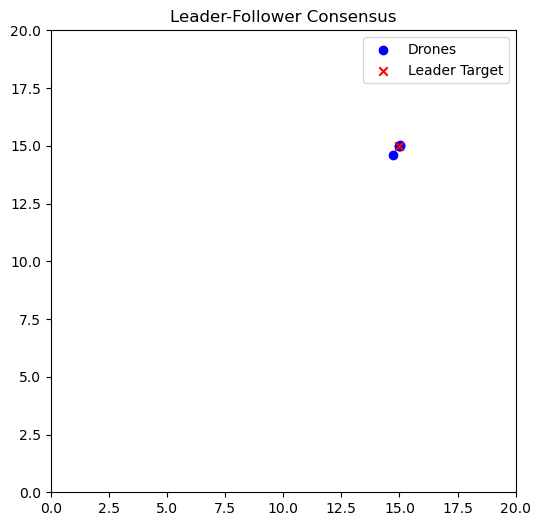

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Settings
n_drones = 5
positions = np.random.rand(n_drones, 2) * 10
leader_idx = 0
target = np.array([15, 15])
learning_rate = 0.05

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(positions[:,0], positions[:,1], c='blue', label='Drones')
target_sc = ax.scatter(target[0], target[1], c='red', marker='x', label='Leader Target')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.legend()
ax.set_title('Leader-Follower Consensus')

is_paused = False

def update(frame):
    global positions, is_paused
    if not is_paused:
        # Leader moves to target
        direction_leader = target - positions[leader_idx]
        positions[leader_idx] += learning_rate * direction_leader / np.linalg.norm(direction_leader)

        # Followers move towards leader
        for i in range(n_drones):
            if i != leader_idx:
                direction = positions[leader_idx] - positions[i]
                positions[i] += learning_rate * direction / np.linalg.norm(direction)

        sc.set_offsets(positions)
    return sc,

def on_click(event):
    global is_paused
    if event.inaxes: is_paused = not is_paused

fig.canvas.mpl_connect('button_press_event', on_click)
anim = FuncAnimation(fig, update, frames=300, interval=100, blit=True)
HTML(anim.to_jshtml())
